<a href="https://colab.research.google.com/github/priyakter/Simulation-lab-Exercise/blob/main/histrogram.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

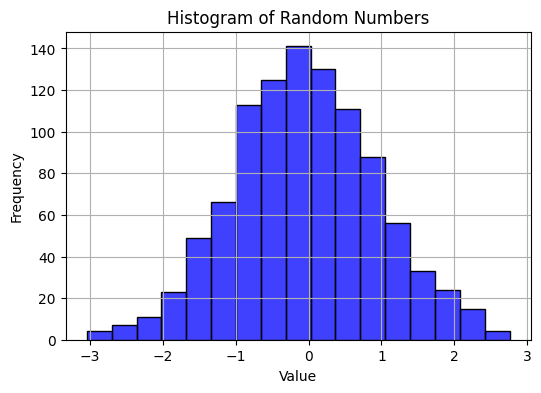

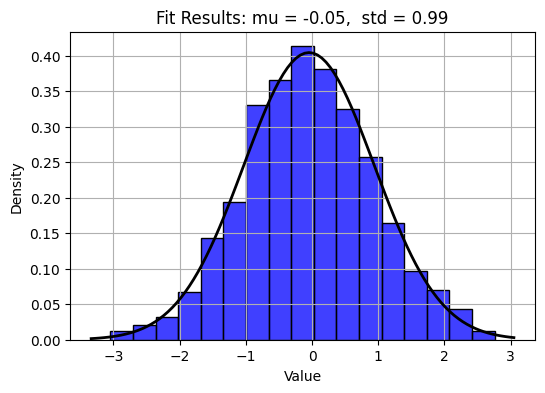

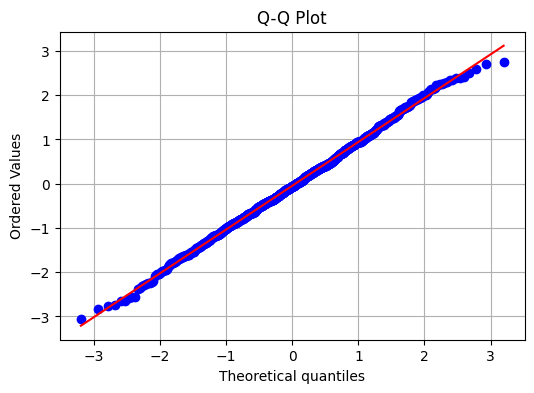

K-S test statistic: 0.01903411267034605, p-value: 0.8547733408587939


In [6]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

# Step 1: Generate random numbers following a normal distribution
np.random.seed(0)  # for reproducibility
data = np.random.normal(loc=0, scale=1, size=1000)

# Step 2: Plot histogram
plt.figure(figsize=(6,4))
sns.histplot(data, bins=17, kde=False, color='blue', edgecolor='black')
plt.title('Histogram of Random Numbers')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


mu, std = stats.norm.fit(data)

# Plot the histogram again with the PDF of the fitted distribution
plt.figure(figsize=(6,4))
sns.histplot(data, bins=17, kde=False, color='blue', edgecolor='black', stat='density')

# Plot the PDF
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = stats.norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2)
title = f'Fit Results: mu = {mu:.2f},  std = {std:.2f}'
plt.title(title)
plt.xlabel('Value')
plt.ylabel('Density')
plt.grid(True)
plt.show()

# Step 4: Confirm the best fit distribution using Q-Q plot
fig, ax = plt.subplots(figsize=(6,4))
stats.probplot(data, dist="norm", plot=ax)
plt.title('Q-Q Plot')
plt.grid(True)
plt.show()

# Step 5: Perform a statistical test (optional but recommended)
# Perform the Kolmogorov-Smirnov test for goodness of fit
kstest_result = stats.kstest(data, 'norm', args=(mu, std))
print(f'K-S test statistic: {kstest_result.statistic}, p-value: {kstest_result.pvalue}')
